### 비트 코인 가격 예측  
https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [5]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


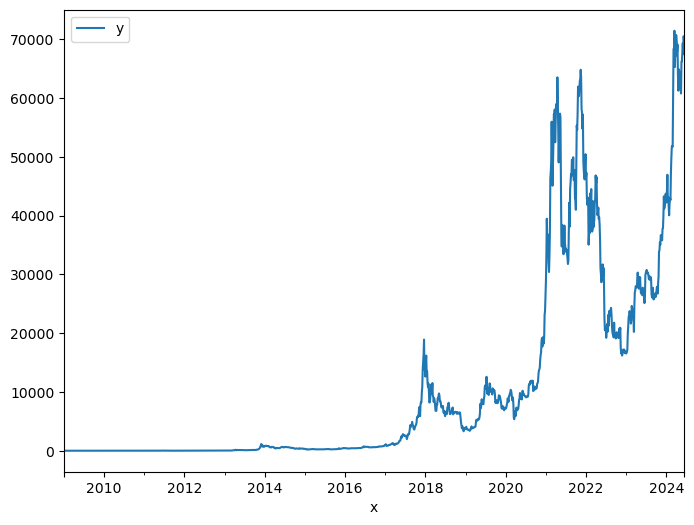

In [6]:
import matplotlib.pyplot as plt

bitcoin_df.plot(figsize=(8, 6), subplots=True)
plt.show()

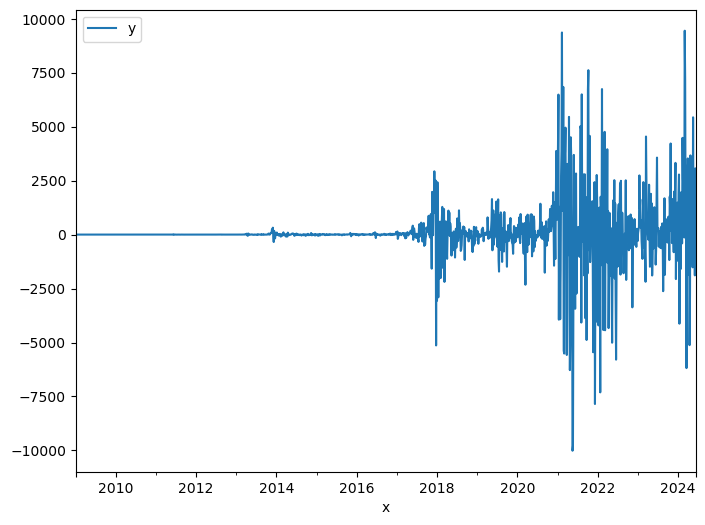

In [7]:
bitcoin_df.diff().plot(figsize=(8, 6), subplots=True)
plt.show()

In [8]:
bitcoin_df = bitcoin_df[bitcoin_df['y'] != 0]
bitcoin_df


,y
x,
2010-08-18,0.07
2010-08-22,0.07
2010-08-26,0.07
2010-08-30,0.07
2010-09-03,0.06
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [9]:
import numpy as np

bit_df = np.log(bitcoin_df / bitcoin_df.shift(1))
bit_df

,y
x,
2010-08-18,NaN
2010-08-22,0.000000
2010-08-26,0.000000
2010-08-30,0.000000
2010-09-03,-0.154151
...,...
2024-05-24,0.024980
2024-05-28,0.020857
2024-06-01,-0.027610


<Axes: xlabel='x'>

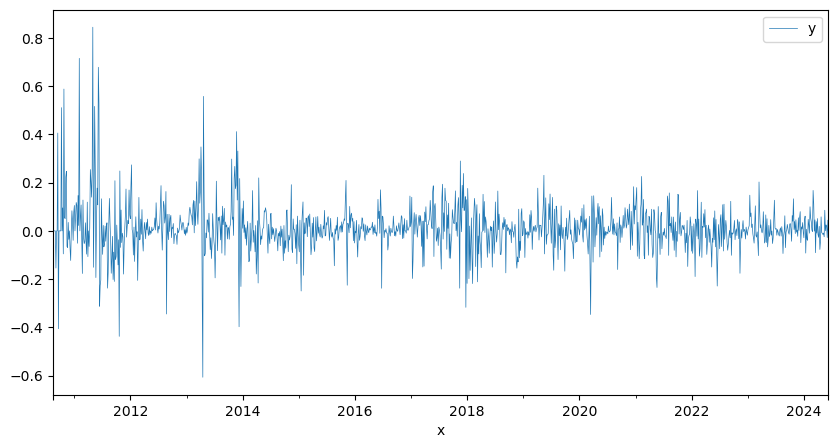

In [10]:
bit_df[['y',]].plot(figsize=(10, 5), lw=0.5)

In [11]:
# 연율화
# 연간 영업일(약 252일로 계산)
bit_df.mean() * 252

y    2.758896
dtype: float64

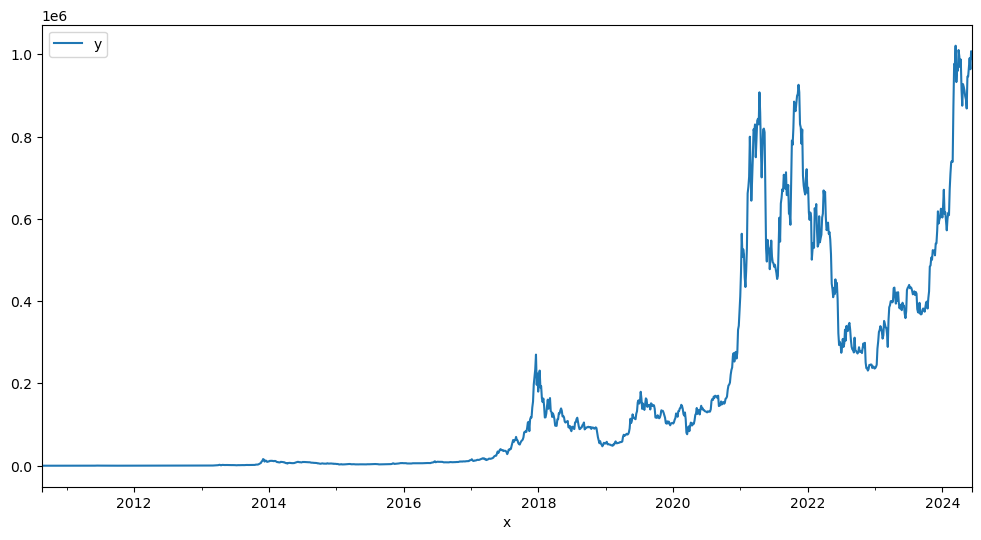

In [12]:
# 일간 수익률
bit_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

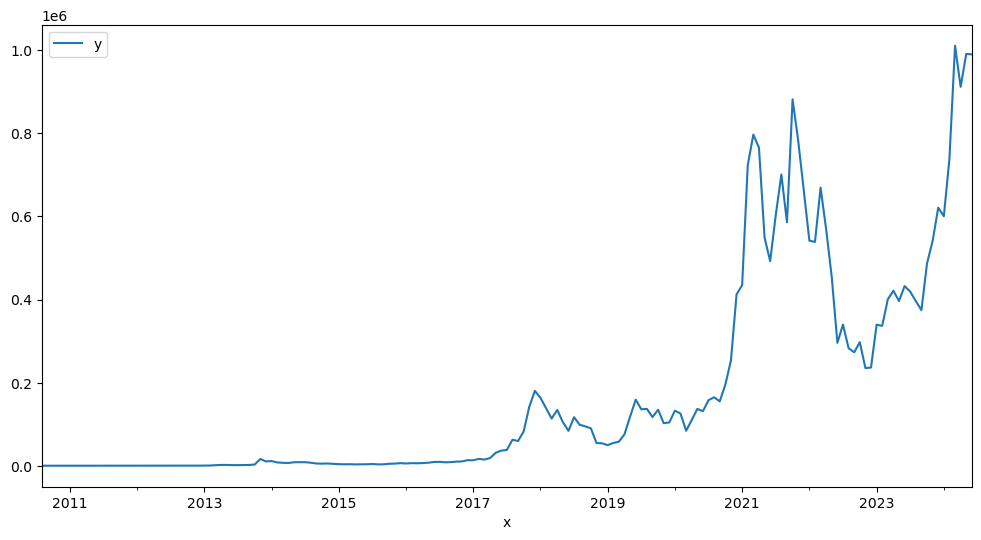

In [13]:
# 월간 수익률
bit_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [14]:
bit_df = bit_df[['y']].dropna()
bit_df

,y
x,
2010-08-22,0.000000
2010-08-26,0.000000
2010-08-30,0.000000
2010-09-03,-0.154151
2010-09-07,0.000000
...,...
2024-05-24,0.024980
2024-05-28,0.020857
2024-06-01,-0.027610


In [15]:
window = 7

bitcoin_df['min'] = bitcoin_df['y'].rolling(window=window).min()
bitcoin_df['mean'] = bitcoin_df['y'].rolling(window=window).mean()
bitcoin_df['std'] = bitcoin_df['y'].rolling(window=window).std()
bitcoin_df['median'] = bitcoin_df['y'].rolling(window=window).median()
bitcoin_df['max'] = bitcoin_df['y'].rolling(window=window).max()

bitcoin_df.dropna()

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\737745986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['min'] = bitcoin_df['y'].rolling(window=window).min()
C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\737745986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['mean'] = bitcoin_df['y'].rolling(window=window).mean()
C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\737745986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,y,min,mean,std,median,max
x,,,,,,
2010-09-11,0.06,0.06,0.065714,0.005345,0.07,0.07
2010-09-15,0.09,0.06,0.068571,0.010690,0.07,0.09
2010-09-19,0.06,0.06,0.067143,0.011127,0.06,0.09
2010-09-23,0.06,0.06,0.065714,0.011339,0.06,0.09
2010-09-27,0.06,0.06,0.064286,0.011339,0.06,0.09
...,...,...,...,...,...,...
2024-05-24,67942.23,60805.78,64327.797143,2556.772008,63832.72,67942.23
2024-05-28,69374.17,60805.78,65119.432857,3163.765334,66239.13,69374.17
2024-06-01,67484.93,60805.78,65776.527143,3099.412559,66266.07,69374.17


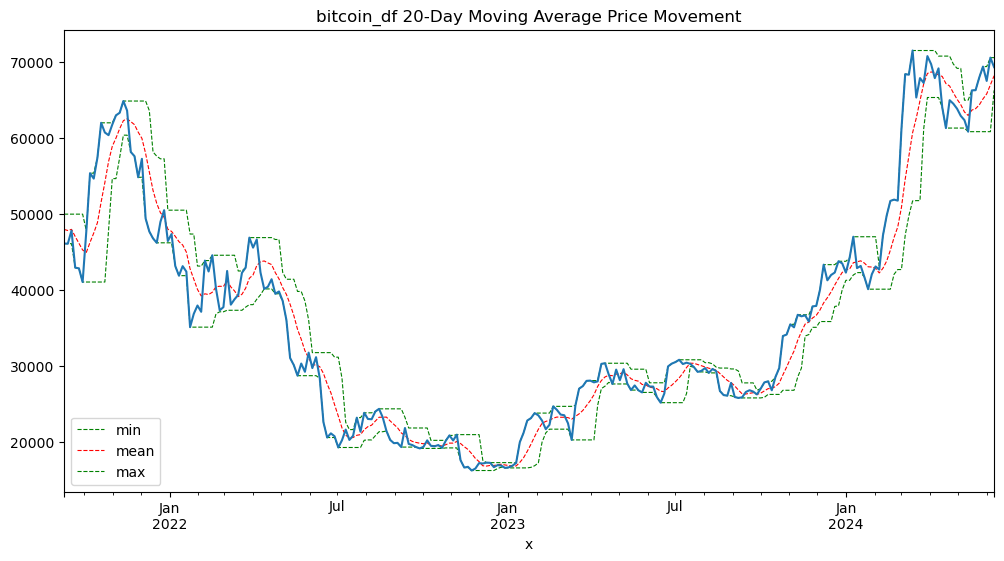

In [16]:
import matplotlib.pyplot as plt

ax = bitcoin_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
bitcoin_df['y'].iloc[-252:].plot(ax=ax)
plt.title("bitcoin_df 20-Day Moving Average Price Movement")
plt.show()

In [17]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

bitcoin_df['SMA1'] = bitcoin_df['y'].rolling(window=21).mean() #short-term
bitcoin_df['SMA2'] = bitcoin_df['y'].rolling(window=252).mean() #long-term
bitcoin_df[['y', 'SMA1', 'SMA2']].tail()

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\1591567605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['SMA1'] = bitcoin_df['y'].rolling(window=21).mean() #short-term
C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\1591567605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['SMA2'] = bitcoin_df['y'].rolling(window=252).mean() #long-term


,y,SMA1,SMA2
x,,,
2024-05-24,67942.23,66240.335238,35938.461587
2024-05-28,69374.17,66287.787619,36017.234087
2024-06-01,67484.93,66248.646190,36090.361349
2024-06-05,70553.24,66204.075714,36183.208056
2024-06-09,69297.93,66394.278571,36259.995952


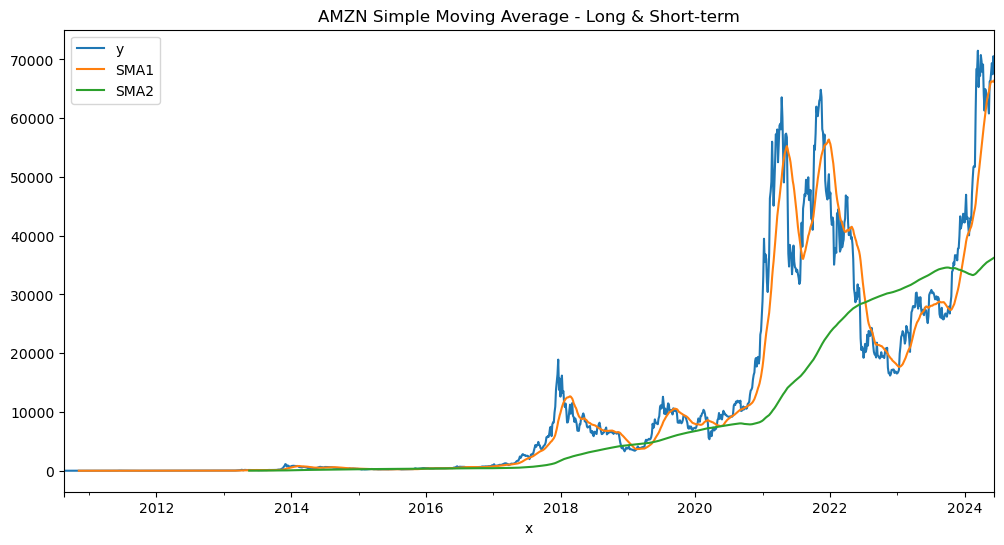

In [18]:
bitcoin_df[['y', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")
plt.show()

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\61392077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df.dropna(inplace=True)
C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\61392077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['positions'] = np.where(bitcoin_df['SMA1'] > bitcoin_df['SMA2'], 1, -1)  # 1: buy , -1: sell /


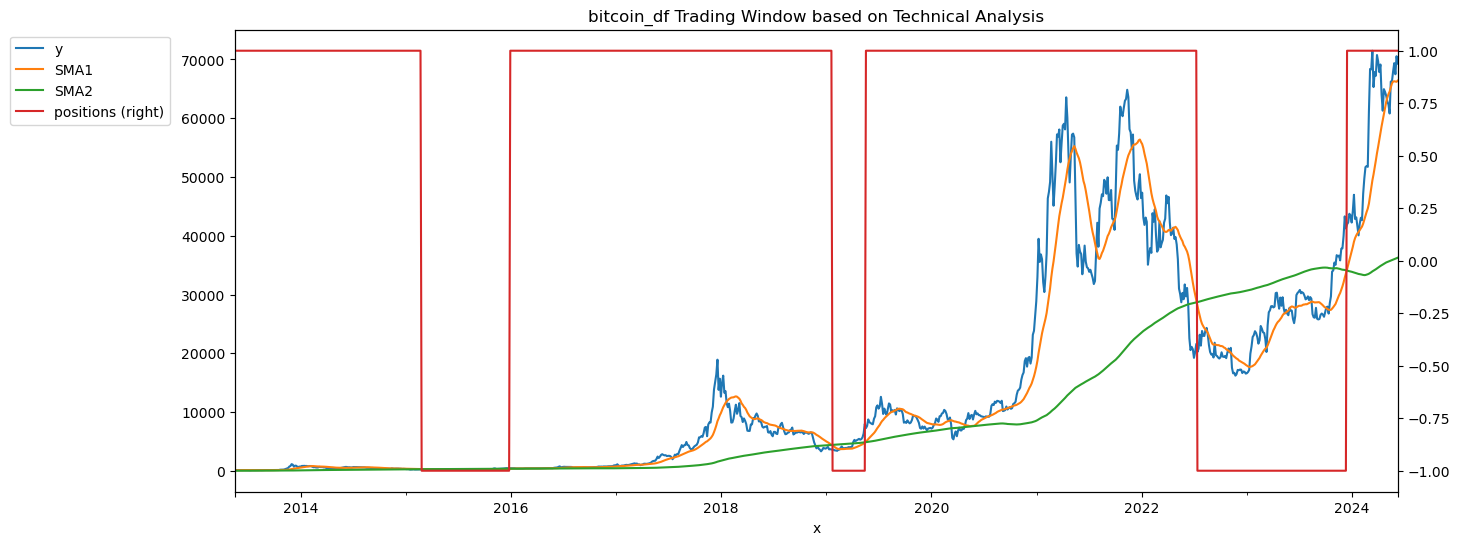

In [19]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
bitcoin_df.dropna(inplace=True)

bitcoin_df['positions'] = np.where(bitcoin_df['SMA1'] > bitcoin_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = bitcoin_df[['y', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("bitcoin_df Trading Window based on Technical Analysis")
plt.show()

In [20]:
y_train = bitcoin_df['y'][:int(0.8 * len(bitcoin_df))]
y_test = bitcoin_df['y'][int(0.8 * len(bitcoin_df)):]

<Axes: xlabel='x'>

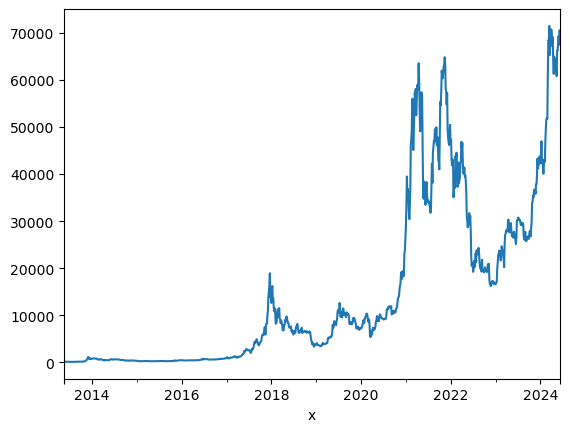

In [21]:
bitcoin_df.y.plot()

<Axes: xlabel='x'>

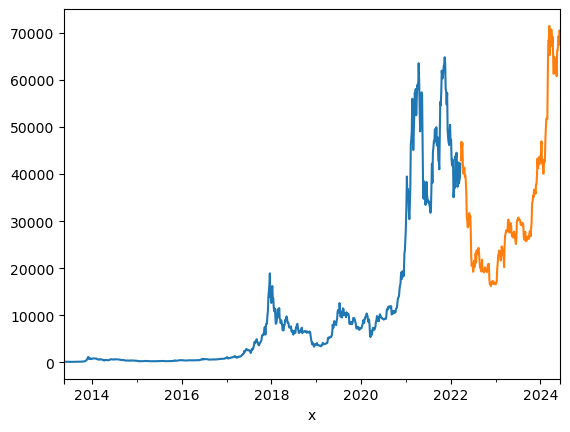

In [22]:
y_train.plot()
y_test.plot()

In [23]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [24]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14045.040, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14041.067, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14040.646, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14044.082, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14041.905, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14041.873, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14043.763, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14039.530, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14040.755, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14040.817, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14039.953, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14042.591, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.939 seconds


In [25]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  808
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -7017.765
Date:                Wed, 12 Jun 2024   AIC                          14039.530
Time:                        11:18:30   BIC                          14048.917
Sample:                    05-18-2013   HQIC                         14043.134
                         - 03-20-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0933      0.014      6.884      0.000       0.067       0.120
sigma2      2.104e+06   3.84e+04     54.864      0.000    2.03e+06    2.18e+06
Ljung-Box (L1) (Q):                   0.01   Jarque-

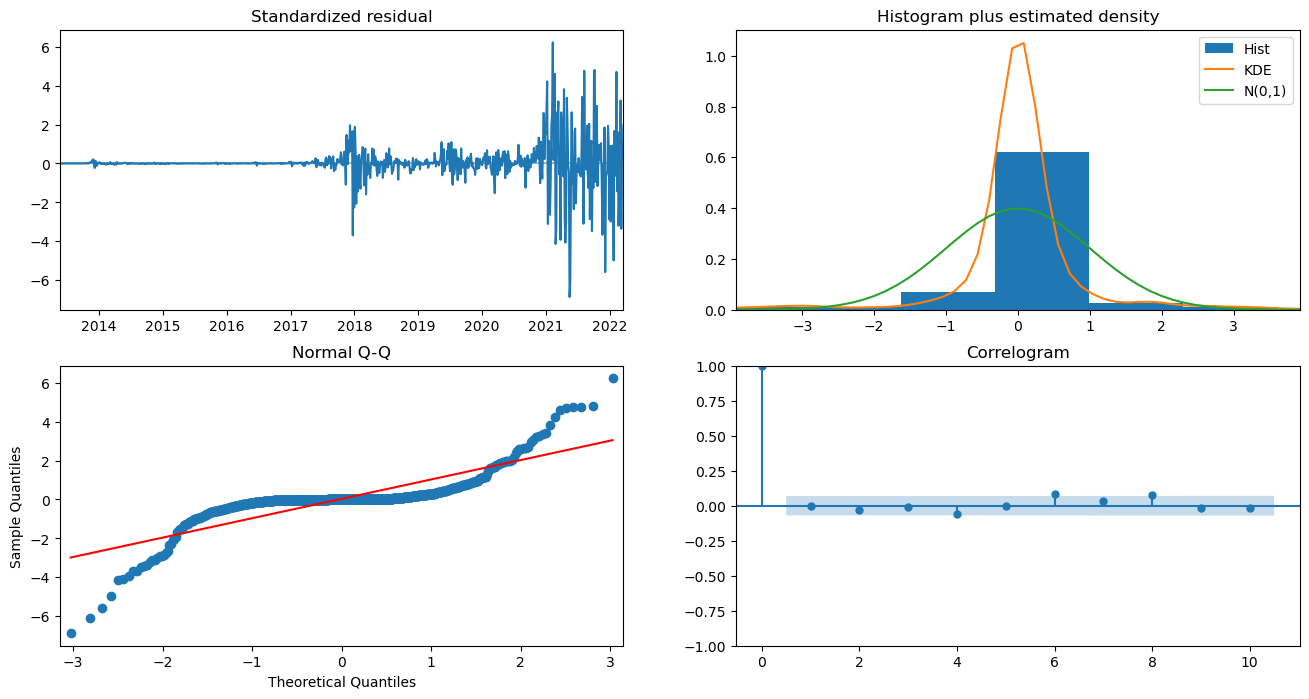

In [27]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [28]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [29]:
import pandas as pd

# Initialize an empty list to store predictions
p_list = []

# Iterate over y_test and predict one step at a time
for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

# Assuming p_list contains individual prediction values, we need to flatten it if it contains nested arrays
p_list_flat = [item if isinstance(item, (float, int)) else item[0] for item in p_list]

# Create a DataFrame with y_test and p_list
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list_flat})

# Display the DataFrame
y_predict_df

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_12196\1635182206.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_list_flat = [item if isinstance(item, (float, int)) else item[0] for item in p_list]


,test,pred
x,,
2022-03-24,42905.06,42488.859858
2022-03-28,46858.53,42943.991636
2022-04-01,45539.22,47227.919151
2022-04-05,46611.26,45388.047344
2022-04-09,42278.94,46719.685296
...,...,...
2024-05-24,67942.23,66234.705951
2024-05-28,69374.17,68078.191543
2024-06-01,67484.93,69477.342010


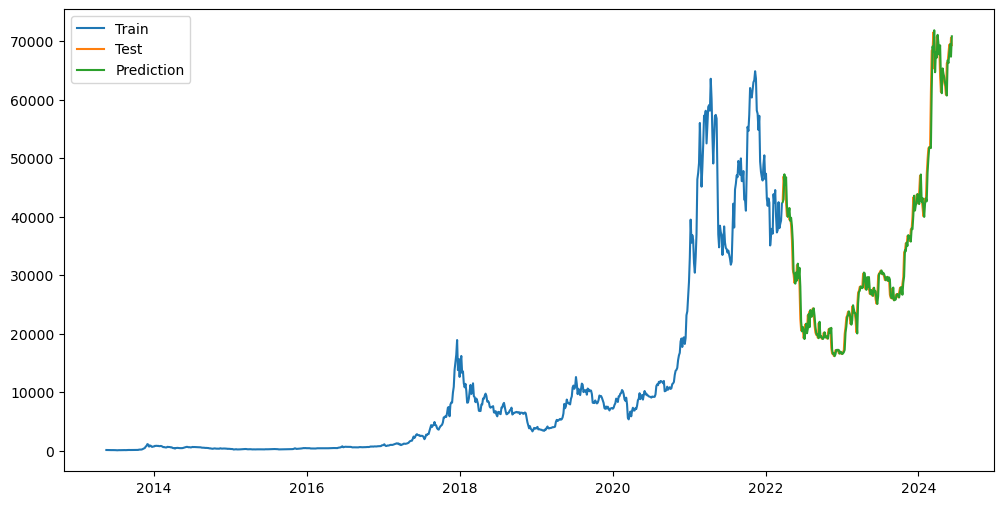

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [35]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_predict_df.test, y_predict_df.pred):.4f}')

MAPE (%): 4.0189


In [37]:
filtered_df = bitcoin_df[bitcoin_df.index >= '2017-01-01']
filtered_df

,y,min,mean,std,median,max,SMA1,SMA2,positions
x,,,,,,,,,
2017-01-01,964.84,766.48,844.384286,87.700945,791.03,964.84,747.589524,433.887857,1
2017-01-05,1109.16,768.19,893.338571,124.773248,913.93,1109.16,770.160952,436.546746,1
2017-01-09,910.49,775.88,913.667143,111.914723,913.93,1109.16,783.090476,438.342341,1
2017-01-13,805.52,791.03,917.901429,106.250047,913.93,1109.16,791.501429,440.074563,1
2017-01-17,830.56,805.52,923.548571,99.199605,913.93,1109.16,800.388571,441.546468,1
...,...,...,...,...,...,...,...,...,...
2024-05-24,67942.23,60805.78,64327.797143,2556.772008,63832.72,67942.23,66240.335238,35938.461587,1
2024-05-28,69374.17,60805.78,65119.432857,3163.765334,66239.13,69374.17,66287.787619,36017.234087,1
2024-06-01,67484.93,60805.78,65776.527143,3099.412559,66266.07,69374.17,66248.646190,36090.361349,1


In [38]:
y_train = filtered_df['y'][:int(0.8 * len(filtered_df))]
y_test = filtered_df['y'][int(0.8 * len(filtered_df)):]

<Axes: xlabel='x'>

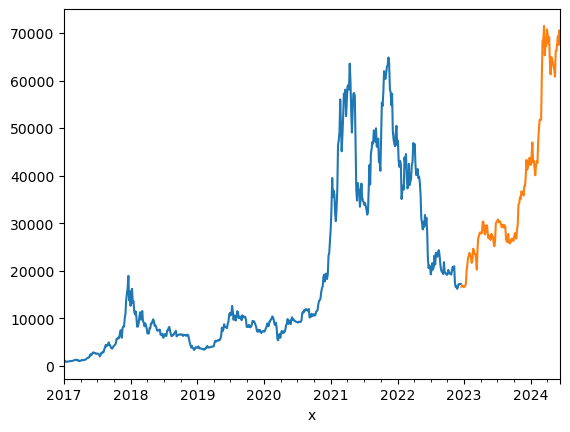

In [39]:
y_train.plot()
y_test.plot()

In [40]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [41]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9728.517, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9726.582, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9726.546, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9726.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9728.545, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9728.592, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9730.550, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9724.663, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9726.662, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9726.709, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9724.698, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9728.605, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.513 seconds


In [42]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [43]:
#Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6434.31
#Prob(Q):                              0.92   Prob(JB):                         0.00
#Heteroskedasticity (H):            2868.16   Skew:                            -0.37
#Prob(H) (two-sided):                  0.00   Kurtosis:                        16.81

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4860.331
Date:                Wed, 12 Jun 2024   AIC                           9724.663
Time:                        11:24:18   BIC                           9733.257
Sample:                    01-01-2017   HQIC                          9728.023
                         - 12-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0862      0.022      3.865      0.000       0.042       0.130
sigma2       3.51e+06   1.07e+05     32.672      0.000     3.3e+06    3.72e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

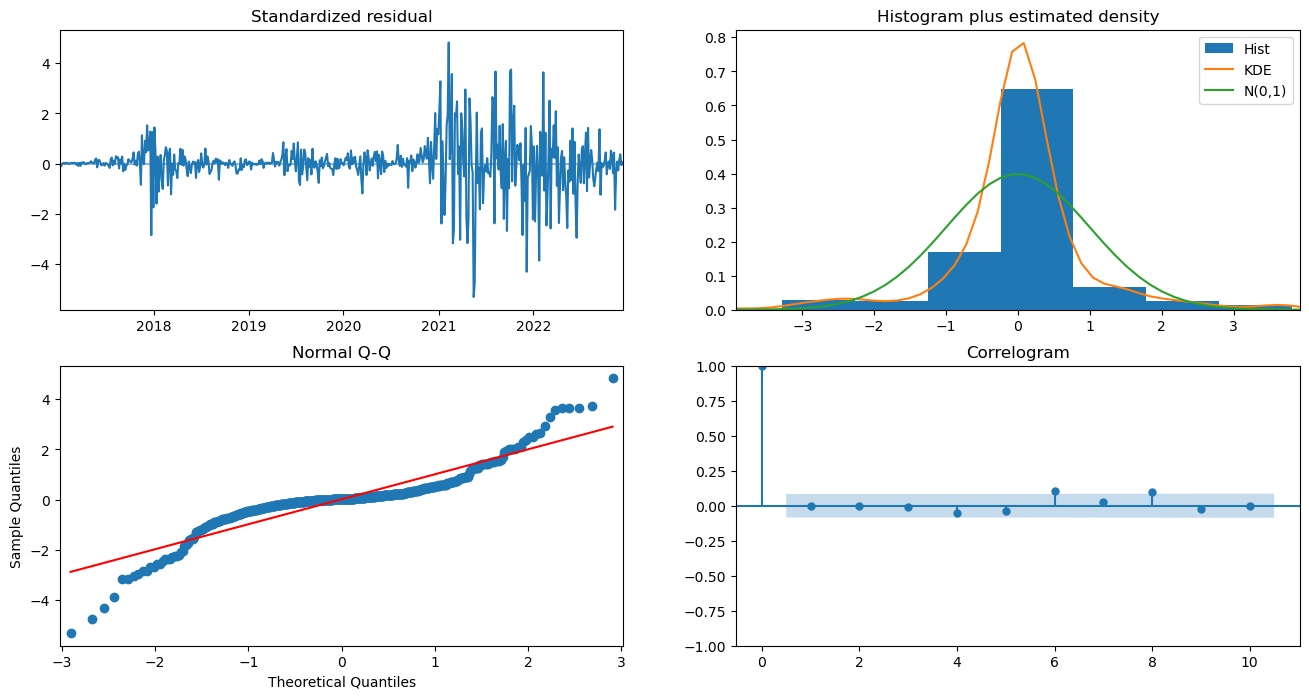

In [44]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [45]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [46]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

In [47]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
x,,
2022-12-17,16637.60,17203.541131
2022-12-21,16904.64,16588.820530
2022-12-25,16838.10,16931.825475
2022-12-29,16539.28,16830.033169
2023-01-02,16613.71,16514.245985
...,...,...
2024-05-24,67942.23,66234.722994
2024-05-28,69374.17,68073.747880
2024-06-01,67484.93,69475.407048


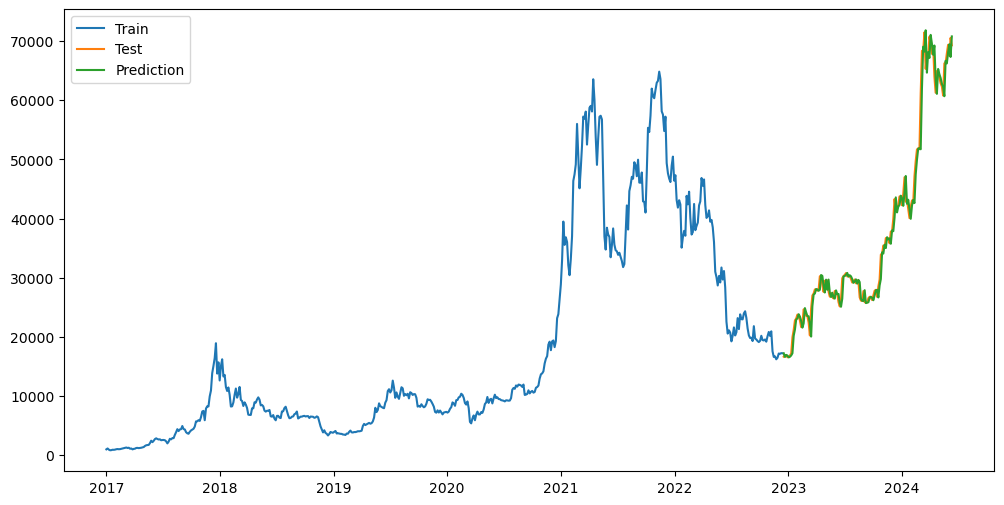

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [49]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 3.5465


In [54]:
test_df = np.log(filtered_df['y'])
test_df= pd.DataFrame(test_df)
test_df

,y
x,
2017-01-01,6.871962
2017-01-05,7.011358
2017-01-09,6.813983
2017-01-13,6.691488
2017-01-17,6.722100
...,...
2024-05-24,11.126413
2024-05-28,11.147270
2024-06-01,11.119660


In [55]:
y_train = test_df['y'][:int(0.8 * len(test_df))]
y_test = test_df['y'][int(0.8 * len(test_df)):]

<Axes: xlabel='x'>

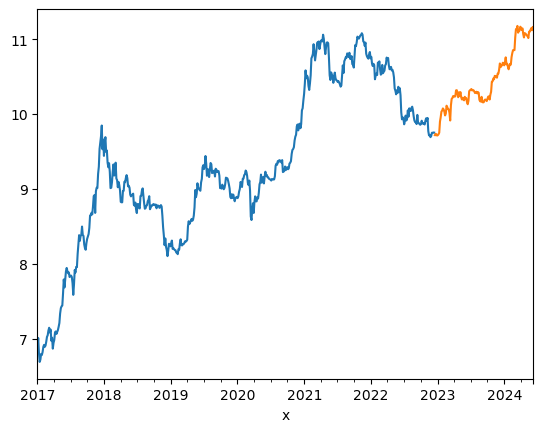

In [56]:
y_train.plot()
y_test.plot()

In [57]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다."로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [58]:
import pmdarima as pm

model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1171.550, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1170.718, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1170.710, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1171.280, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1170.901, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.553 seconds


In [59]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [60]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다.
# 0.05 이상: 서로 독립이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 587.775
Date:                Wed, 12 Jun 2024   AIC                          -1171.550
Time:                        11:38:31   BIC                          -1162.956
Sample:                    01-01-2017   HQIC                         -1168.190
                         - 12-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.004      1.483      0.138      -0.002       0.012
sigma2         0.0067      0.000     20.860      0.000       0.006       0.007
Ljung-Box (L1) (Q):                   1.17   Jarque-

In [61]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [62]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

In [63]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
x,,
2022-12-17,9.719420,9.758370
2022-12-21,9.735343,9.724650
2022-12-25,9.731399,9.740592
2022-12-29,9.713493,9.736639
2023-01-02,9.717984,9.718683
...,...,...
2024-05-24,11.126413,11.107707
2024-05-28,11.147270,11.132711
2024-06-01,11.119660,11.153589


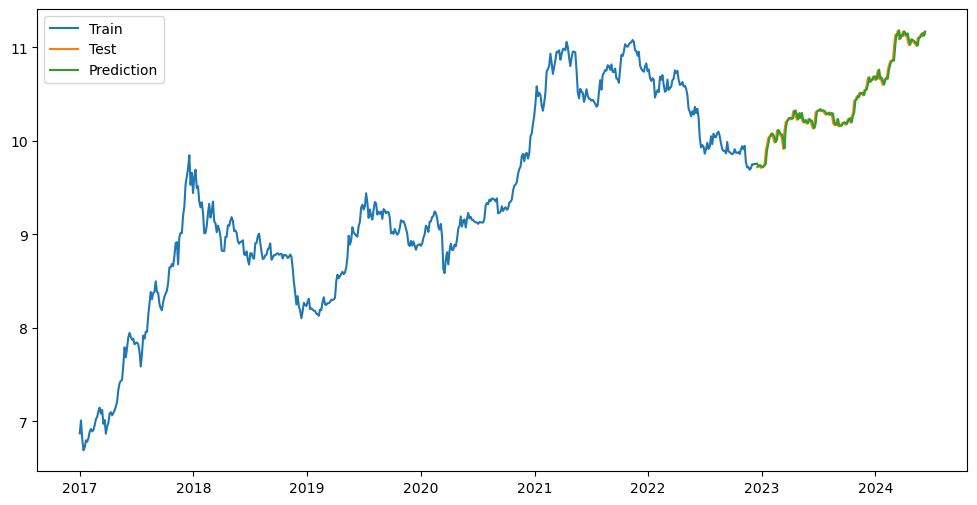

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [67]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 0.3439
